<a href="https://colab.research.google.com/github/piotrciechowicz/crisis_classifiers/blob/main/Attrition_of_employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Odczyt danych

In [124]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df1.csv')
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [125]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df2.csv')
df2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [126]:
df2.iloc[:,1:]

,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [127]:
df = pd.concat([df1,df2.iloc[:,1:]], axis = 1)
df.sample(5)

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
146,1669,29.0,Travel_Rarely,991.0,Sales,5.0,3.0,Medical,1.0,1.0,...,1.0,10.0,3.0,2.0,10.0,0.0,0.0,9.0,No,50244.0
4042,7573,40.0,Travel_Rarely,1194.0,Research & Development,2.0,4.0,Medical,1.0,3.0,...,3.0,20.0,2.0,3.0,5.0,1838.0,0.0,2.0,No,24012.0
4348,7879,34.0,Travel_Rarely,1111.0,Sales,8.0,2.0,Life Sciences,1.0,3.0,...,1.0,6.0,1.0,3.0,3.0,2.0,1.0,2.0,Yes,78000.0
2052,5583,31.0,Travel_Frequently,1125.0,Research & Development,1.0,3.0,Life Sciences,1.0,4.0,...,0.0,10.0,6.0,3.0,10.0,8.0,5392.0,7.0,Yes,60036.0
644,424,31.0,Travel_Rarely,106.0,Human Resources,2.0,3.0,Human Resources,1.0,1.0,...,0.0,9.0,1.0,3.0,2.0,2.0,1.0,0.0,No,76920.0


In [128]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,...,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,...,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,...,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [129]:
df.isnull().sum()

EmployeeNumber                0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [130]:
df_2 = df.dropna(axis=0)

In [131]:
df_2.dtypes

EmployeeNumber                int64
Age                         float64
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

##Usunięcie kolumn nieistotnych 

In [132]:
df_3 = df_2.drop(['StandardHours','EmployeeNumber','Over18','EmployeeCount','MonthlyRate','DailyRate','YearlyIncome','HourlyRate'], inplace=False, axis=1)
df_3.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,2.0,2.0,...,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,2.0,3.0,...,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,2.0,1.0,...,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,3.0,1.0,...,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,3.0,1.0,...,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No


In [133]:
df_3['TrainingTimesLastYear']

0       1.0
1       6.0
2       3.0
3       3.0
4       3.0
       ... 
4444    2.0
4445    2.0
4446    5.0
4447    5.0
4448    5.0
Name: TrainingTimesLastYear, Length: 4302, dtype: float64

In [134]:
df_3.dtypes

Age                         float64
BusinessTravel               object
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EnvironmentSatisfaction     float64
Gender                       object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
YearsWithCurrManager        float64
Attrition                   

## Uśrednienie wartości odstających

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


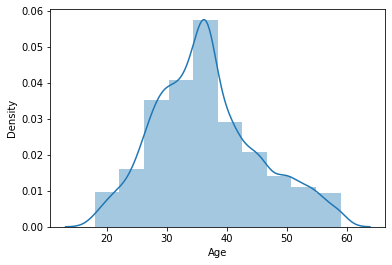

In [135]:
mean_age = df_3['Age'][df_3['Age']<60].mean()
df_3['Age'] = np.where(df_3['Age']<60, df_3['Age'], mean_age)
sns.distplot(df_3.Age, bins =10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


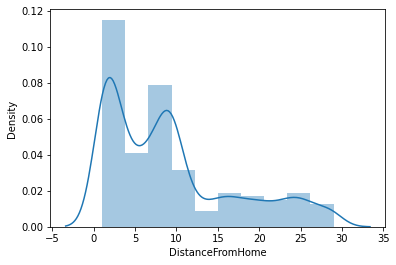

In [136]:
mean_DistanceFromHome = df_3['DistanceFromHome'][df_3['DistanceFromHome']<30].mean()
df_3['DistanceFromHome'] = np.where(df_3['DistanceFromHome']<30, df_3['DistanceFromHome'], mean_DistanceFromHome)
sns.distplot(df_3.DistanceFromHome, bins =10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


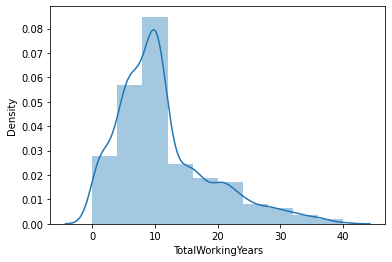

In [137]:
mean_TotalWorkingYears = df_3['TotalWorkingYears'][df_3['TotalWorkingYears']<50].mean()
df_3['TotalWorkingYears'] = np.where(df_3['TotalWorkingYears']<50, df_3['TotalWorkingYears'], mean_TotalWorkingYears)
sns.distplot(df_3.TotalWorkingYears, bins =10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


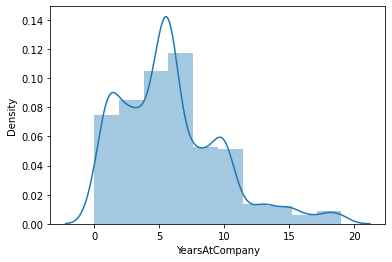

In [138]:
mean_YearsAtCompany = df_3['YearsAtCompany'][df_3['YearsAtCompany']<20].mean()
df_3['YearsAtCompany'] = np.where(df_3['YearsAtCompany']<20, df_3['YearsAtCompany'], mean_YearsAtCompany)
sns.distplot(df_3.YearsAtCompany, bins =10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


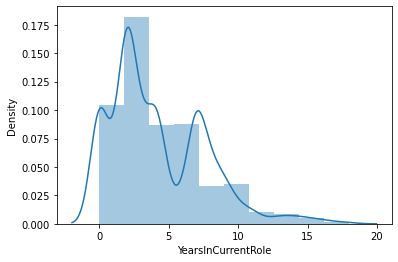

In [139]:
mean_YearsInCurrentRole = df_3['YearsInCurrentRole'][df_3['YearsInCurrentRole']<20].mean()
df_3['YearsInCurrentRole'] = np.where(df_3['YearsInCurrentRole']<20, df_3['YearsInCurrentRole'], mean_YearsInCurrentRole)
sns.distplot(df_3.YearsInCurrentRole, bins =10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


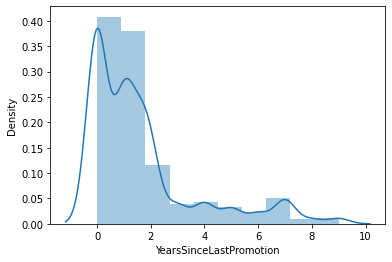

In [140]:
mean_YearsSinceLastPromotion = df_3['YearsSinceLastPromotion'][df_3['YearsSinceLastPromotion']<10].mean()
df_3['YearsSinceLastPromotion'] = np.where(df_3['YearsSinceLastPromotion']<10, df_3['YearsSinceLastPromotion'], mean_YearsSinceLastPromotion)
sns.distplot(df_3.YearsSinceLastPromotion, bins =10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


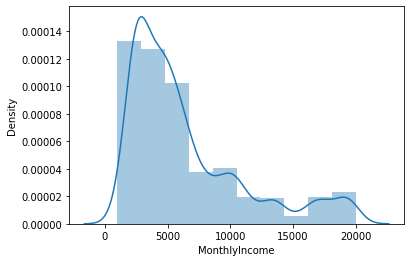

In [141]:
sns.distplot(df_3.MonthlyIncome, bins =10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


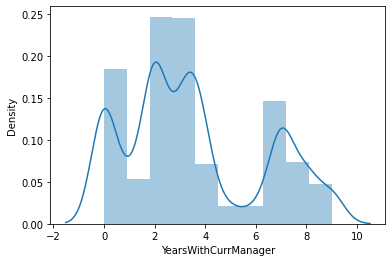

In [142]:
mean_YearsWithCurrManager = df_3['YearsWithCurrManager'][df_3['YearsWithCurrManager']<10].mean()
df_3['YearsWithCurrManager'] = np.where(df_3['YearsWithCurrManager']<10, df_3['YearsWithCurrManager'], mean_YearsWithCurrManager)
sns.distplot(df_3.YearsWithCurrManager, bins =10)

In [143]:
num_cols = df_3.columns[df_3.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [144]:
df_4 = pd.get_dummies(df_3)
df_4

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,30.000000,1.000000,1.0,4.0,2.0,2.0,4.0,5126.0,1.0,12.0,...,0,0,0,0,1,0,0,1,1,0
1,38.000000,2.000000,2.0,4.0,2.0,3.0,3.0,7756.0,3.0,19.0,...,0,0,0,0,1,0,0,1,1,0
2,26.000000,6.000000,3.0,3.0,2.0,1.0,2.0,2368.0,1.0,19.0,...,1,0,0,0,1,0,1,0,1,0
3,28.000000,8.000000,2.0,4.0,3.0,1.0,4.0,3310.0,1.0,21.0,...,1,0,0,0,0,1,1,0,1,0
4,35.000000,4.000000,2.0,3.0,3.0,1.0,4.0,1951.0,1.0,12.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,36.675269,15.000000,3.0,1.0,3.0,3.0,4.0,7978.0,1.0,11.0,...,0,0,0,0,1,0,1,0,0,1
4445,36.675269,15.000000,3.0,1.0,3.0,3.0,4.0,7978.0,1.0,11.0,...,0,0,0,0,1,0,1,0,0,1
4446,44.000000,9.224459,3.0,1.0,1.0,1.0,3.0,3708.0,2.0,14.0,...,0,0,0,0,0,1,1,0,0,1
4447,44.000000,9.224459,3.0,1.0,1.0,1.0,3.0,3708.0,2.0,14.0,...,0,0,0,0,0,1,1,0,0,1


## Heatmap korelacji zmiennych

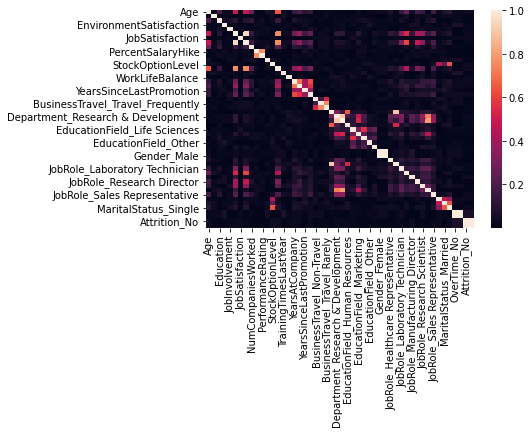

In [145]:
corr = df_4.corr()
sns.heatmap(np.abs(corr))

In [146]:
df_4.dtypes

Age                                  float64
DistanceFromHome                     float64
Education                            float64
EnvironmentSatisfaction              float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
NumCompaniesWorked                   float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
YearsInCurrentRole                   float64
YearsSinceLastPromotion              float64
YearsWithCurrManager                 float64
BusinessTravel_Non-Travel              uint8
BusinessTravel_Travel_Frequently       uint8
BusinessTr

In [147]:
df_5 = df_4.drop(['Department_Research & Development','Department_Sales','Department_Human Resources','WorkLifeBalance'], inplace=False, axis=1)

In [148]:
df_5

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,30.000000,1.000000,1.0,4.0,2.0,2.0,4.0,5126.0,1.0,12.0,...,0,0,0,0,1,0,0,1,1,0
1,38.000000,2.000000,2.0,4.0,2.0,3.0,3.0,7756.0,3.0,19.0,...,0,0,0,0,1,0,0,1,1,0
2,26.000000,6.000000,3.0,3.0,2.0,1.0,2.0,2368.0,1.0,19.0,...,1,0,0,0,1,0,1,0,1,0
3,28.000000,8.000000,2.0,4.0,3.0,1.0,4.0,3310.0,1.0,21.0,...,1,0,0,0,0,1,1,0,1,0
4,35.000000,4.000000,2.0,3.0,3.0,1.0,4.0,1951.0,1.0,12.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,36.675269,15.000000,3.0,1.0,3.0,3.0,4.0,7978.0,1.0,11.0,...,0,0,0,0,1,0,1,0,0,1
4445,36.675269,15.000000,3.0,1.0,3.0,3.0,4.0,7978.0,1.0,11.0,...,0,0,0,0,1,0,1,0,0,1
4446,44.000000,9.224459,3.0,1.0,1.0,1.0,3.0,3708.0,2.0,14.0,...,0,0,0,0,0,1,1,0,0,1
4447,44.000000,9.224459,3.0,1.0,1.0,1.0,3.0,3708.0,2.0,14.0,...,0,0,0,0,0,1,1,0,0,1


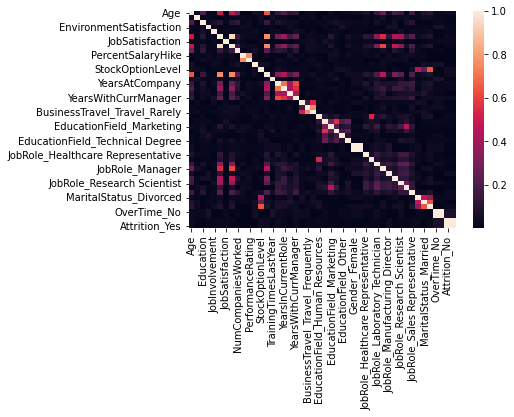

In [149]:
corr = df_5.corr()
sns.heatmap(np.abs(corr))

In [150]:
y = df_5['Attrition_Yes']
X = df_5.drop(['Attrition_Yes','Attrition_No'], inplace=False, axis=1)

#Modelowanie

##Zbiór testowy i treningowy

In [151]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [152]:

X_sc_1= X_train.loc[:,['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

##Standaryzacja

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_sc_1)
X_sc = scaler.transform(X_train.loc[:,['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']])
X_sc_train_1 = pd.DataFrame(data = X_sc,
                           columns = X_sc_1.columns,
                           index = X_sc_1.index)
X_2 = X_train.drop(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'], inplace=False, axis=1)
X_train_st = pd.concat([X_2, X_sc_train_1], axis = 1)

In [154]:
X_test_1 = X_test.loc[:,['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]
X_test_1_sc = scaler.transform(X_test_1)
X_test_1_sc = pd.DataFrame(data = X_test_1_sc,
                           columns = X_test_1.columns,
                           index = X_test_1.index)
X_test_2 = X_test.drop(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'], inplace=False, axis=1)
X_test_st = pd.concat([X_test_2, X_test_1_sc], axis = 1)
X_test_st

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
309,0,1,0,0,0,0,0,0,1,1,...,-0.298854,-0.400524,0.252095,0.240211,-0.166390,2.443926,0.787980,0.786832,0.189405,1.685665
4340,0,0,1,0,0,0,0,1,0,0,...,1.373289,2.496727,-1.608417,0.240211,-1.080705,0.916287,-0.712826,-0.643863,-0.295317,0.012703
1545,0,0,1,0,0,0,1,0,0,1,...,-0.577545,-0.400524,0.252095,1.405875,-0.297006,-0.611352,0.037577,-0.643863,-0.295317,-0.181640
3026,0,1,0,0,0,0,0,1,0,0,...,2.488050,2.496727,-1.608417,-0.925453,0.225459,-0.611352,1.288249,1.359110,2.128291,1.312204
1595,0,0,1,0,1,0,0,0,0,1,...,-0.577545,-0.400524,1.182350,0.240211,-0.427623,0.916287,-0.462692,-0.357724,0.009303,-0.555100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0,0,1,0,1,0,0,0,0,0,...,-0.856235,-0.400524,-1.608417,0.240211,-0.427623,0.152468,0.537846,0.786832,-0.295317,1.312204
3676,0,0,1,0,0,0,0,0,1,1,...,-1.134925,-0.400524,-0.678161,-0.925453,-0.688855,2.443926,-0.212557,-0.071585,1.158848,0.191821
4315,0,0,1,0,0,0,0,0,1,1,...,-0.856235,-0.400524,-1.608417,0.240211,0.617308,1.680107,-0.462692,-0.357724,-0.780039,-0.181640
3609,0,0,1,0,1,0,0,0,0,1,...,0.815908,-0.400524,-0.678161,0.240211,-0.166390,2.443926,0.287712,0.786832,2.128291,-0.555100


##Redukcja wymiarowości

Text(0, 0.5, 'variance')

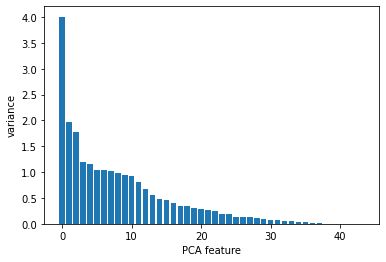

In [155]:
from sklearn.decomposition import PCA
model = PCA()

pca_features_train = model.fit_transform(X_train_st)
pca_features_test = model.transform(X_test_st)

features = range(model.n_components_)
plt.bar(features, model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')

In [156]:
#X_train_st = pca_features_train[:,0:5]
#X_test_st = pca_features_test[:,0:5]

##Regresja logistyczna

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param = {
        'penalty':('l1', 'l2', 'elasticnet', 'none'),
         'C':[0.2 , 0.4 , 0.6 , 0.8 , 1 ]
        }

LR = LogisticRegression(random_state=30, solver = 'saga')
grid_search_lr = GridSearchCV(LR, param, scoring = 'accuracy').fit(X_train_st, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the

In [158]:
y_pred_train = grid_search_lr.predict(X_train_st)
y_pred = grid_search_lr.predict(X_test_st)

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.5455426356589147
Precision: 0.5511393746687865
Recall: 0.65
F1-Score: 0.5965012905075996
Accuracy: 0.5331010452961672
Precision: 0.5325443786982249
Recall: 0.6206896551724138
F1-Score: 0.5732484076433122


##GaussianNB

In [160]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_st, y_train)

y_pred_train = gnb.predict(X_train_st)
y_pred = gnb.predict(X_test_st)

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.5507105943152455
Precision: 0.5743772241992883
Recall: 0.504375
F1-Score: 0.5371048252911814
Accuracy: 0.5121951219512195
Precision: 0.5201072386058981
Recall: 0.4459770114942529
F1-Score: 0.48019801980198024


##BernoulliNB

In [161]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_st, y_train)

y_pred_train = bnb.predict(X_train_st)
y_pred = bnb.predict(X_test_st)

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.5532945736434108
Precision: 0.5644682115270351
Recall: 0.59375
F1-Score: 0.5787389582698751
Accuracy: 0.5319396051103368
Precision: 0.5323886639676113
Recall: 0.6045977011494252
F1-Score: 0.566200215285253


##Lasy Losowe

In [162]:
#bez standaryzacji

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

param= {'max_depth':[2, 6, 3, 1, 10],
        'min_samples_leaf':[1, 4, 3, 2, 5],
        'min_impurity_decrease':[0.2, 0.5, 0.4]}



grid_search_clf = GridSearchCV(clf, param, scoring = 'accuracy').fit(X_train_st, y_train)

y_pred_train = grid_search_clf.predict(X_train_st)
y_pred = grid_search_clf.predict(X_test_st)

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

print("Best CV params", grid_search_clf.best_params_)
grid_search_clf.best_estimator_.feature_importances_

Accuracy: 0.5167958656330749
Precision: 0.5167958656330749
Recall: 1.0
F1-Score: 0.6814310051107325
Accuracy: 0.5052264808362369
Precision: 0.5052264808362369
Recall: 1.0
F1-Score: 0.6712962962962962
Best CV params {'max_depth': 2, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 1}


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])